10. This exercise involves the Boston housing data set.

(a) To begin, load in the Boston data set. The Boston data set is part of the `ISLR2` library. 

```{r}
> library(ISLR2)
```

Now the data set is contained in the object `Boston`. 

```{r}
> Boston
```

Read about the data set:

```{r}
> ?Boston
```

How many rows are in this data set? How many columns? What do the rows and columns represent?

(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

(d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

(e) How many of the census tracts in this data set bound the Charles river?

(f) What is the median pupil-teacher ratio among the towns in this data set?

(g) Which census tract of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

(h) In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the census tracts that average more than eight rooms per dwelling.

(a) To begin, load in the Boston data set. The Boston data set is part of the `ISLR2` library. 

How many rows are in this data set? How many columns? What do the rows and columns represent?


In [1]:
library(ISLR2)
library(corrplot)

corrplot 0.90 loaded



In [2]:
dim(Boston)

[1] 506  13

In [3]:
str(Boston)

'data.frame':	506 obs. of  13 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


There are 506 rows or observations and 13 columns or predictors (features).

(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

In [5]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [21]:
nm <- names(Boston)


NULL

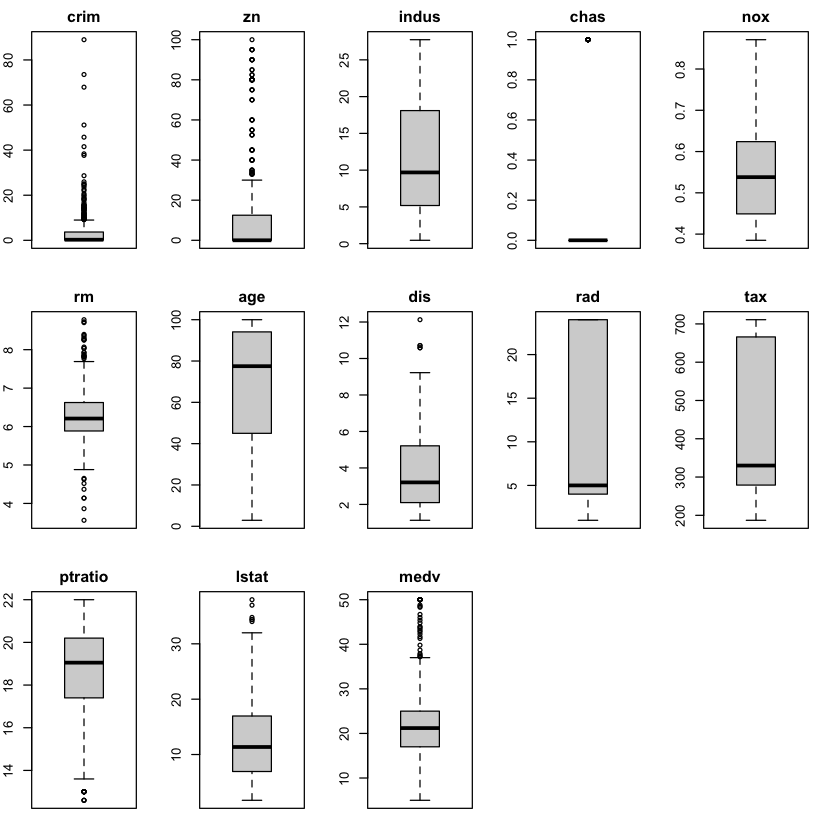

In [26]:
par(mfrow = c(3, 5), mar = c(2, 2, 2, 2))
for (i in seq(1, ncol(Boston))) {
    boxplot(Boston[, nm[i]], main = nm[i])
}

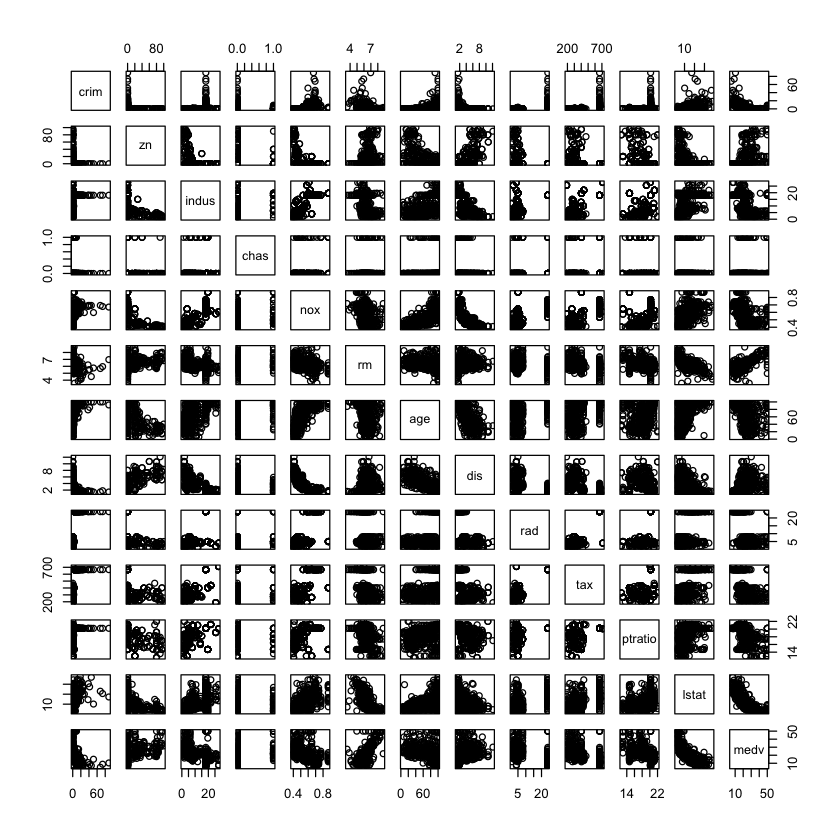

In [7]:
pairs(Boston)

(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

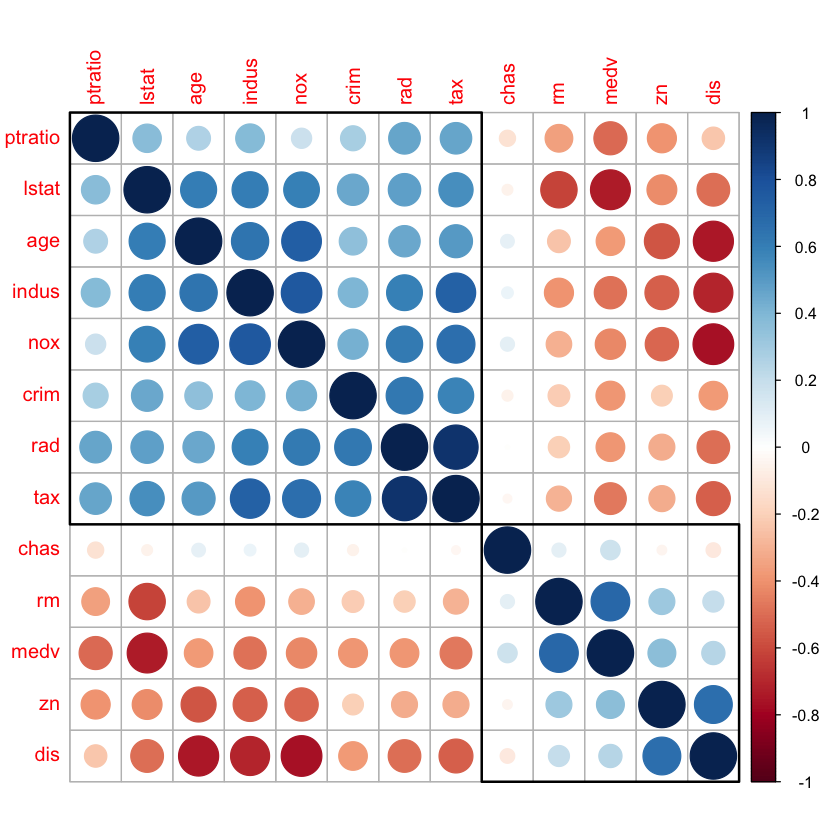

In [8]:
corrplot(cor(Boston), order = "hclust", addrect = 2)

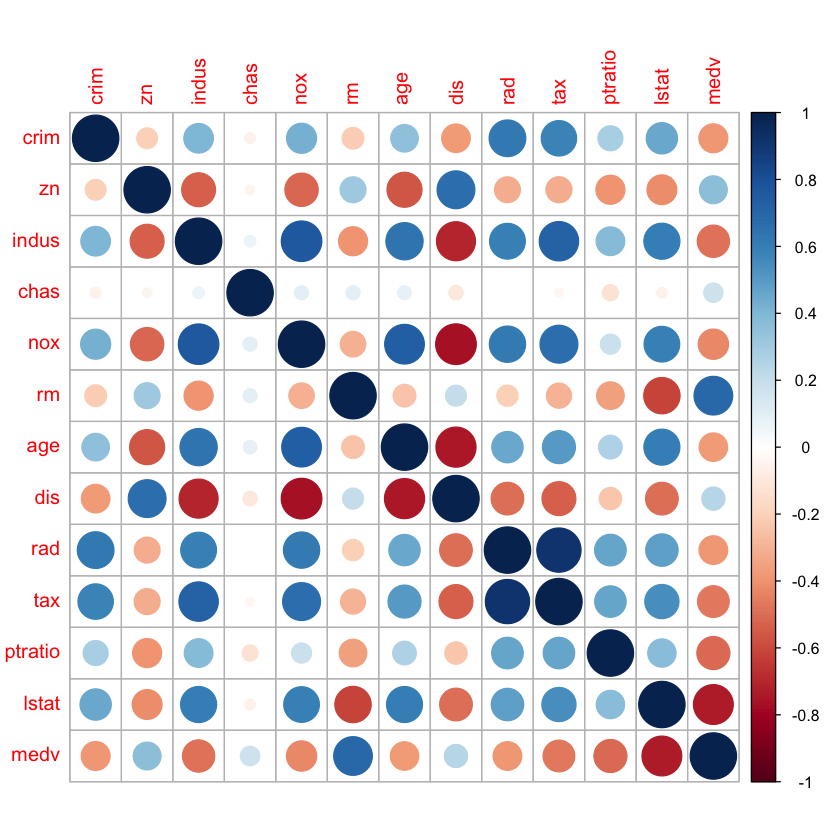

In [9]:
corrplot(cor(Boston))

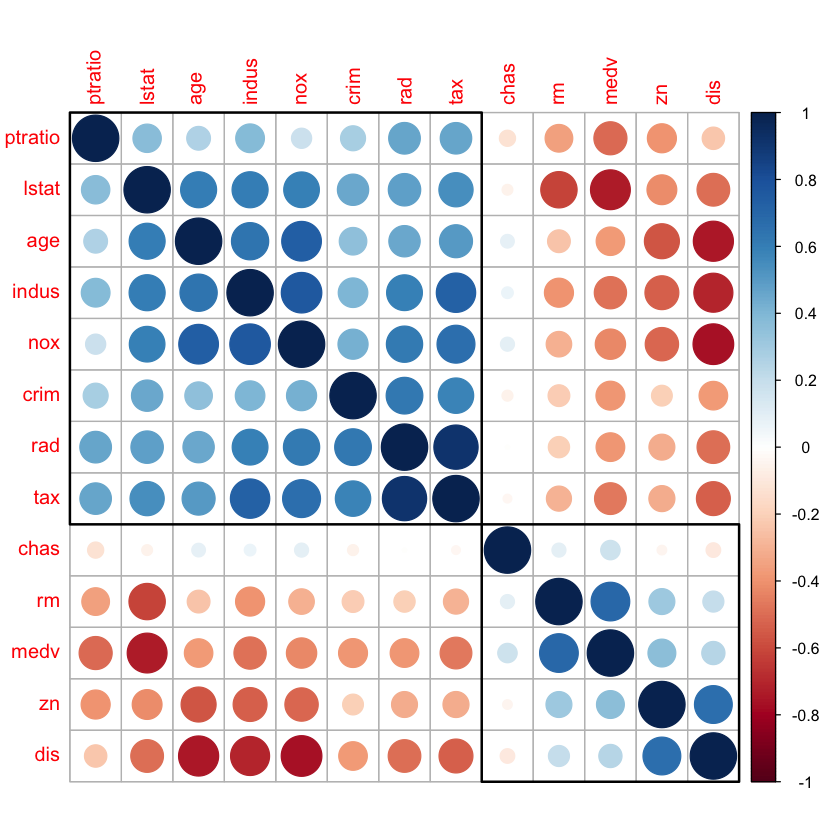

In [10]:
corrplot(cor(Boston), order = "hclust", addrect = 2)

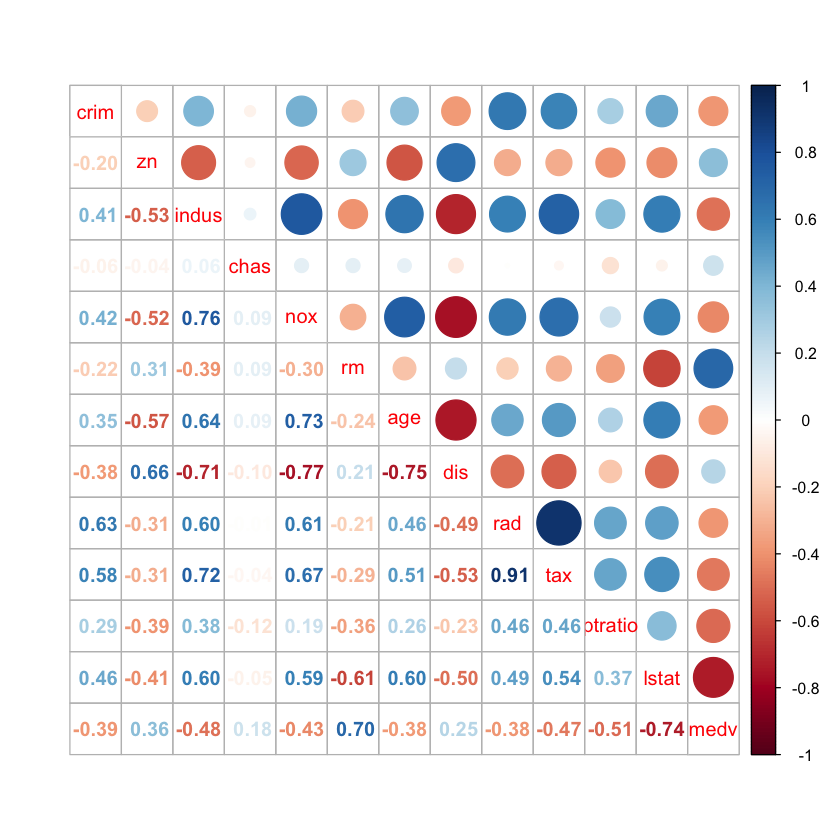

In [11]:
corrplot.mixed(cor(Boston))

We use the `corrplot` function form the homonymous package to extract some information of the correlations between predictors. The pair plots are not very clear. 

The `crim` predictor has the stronger correlations with the `rad` and `tax` features, both positive.

(d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.


In [41]:
sapply(Boston[, c("crim", "tax", "ptratio")], summary)

,crim,tax,ptratio
Min.,0.006320,187.0000,12.60000
1st Qu.,0.082045,279.0000,17.40000
Median,0.256510,330.0000,19.05000
Mean,3.613524,408.2372,18.45553
3rd Qu.,3.677083,666.0000,20.20000
Max.,88.976200,711.0000,22.00000


(e) How many of the census tracts in this data set bound the Charles river?

In [55]:
sum(Boston$chas)

[1] 35

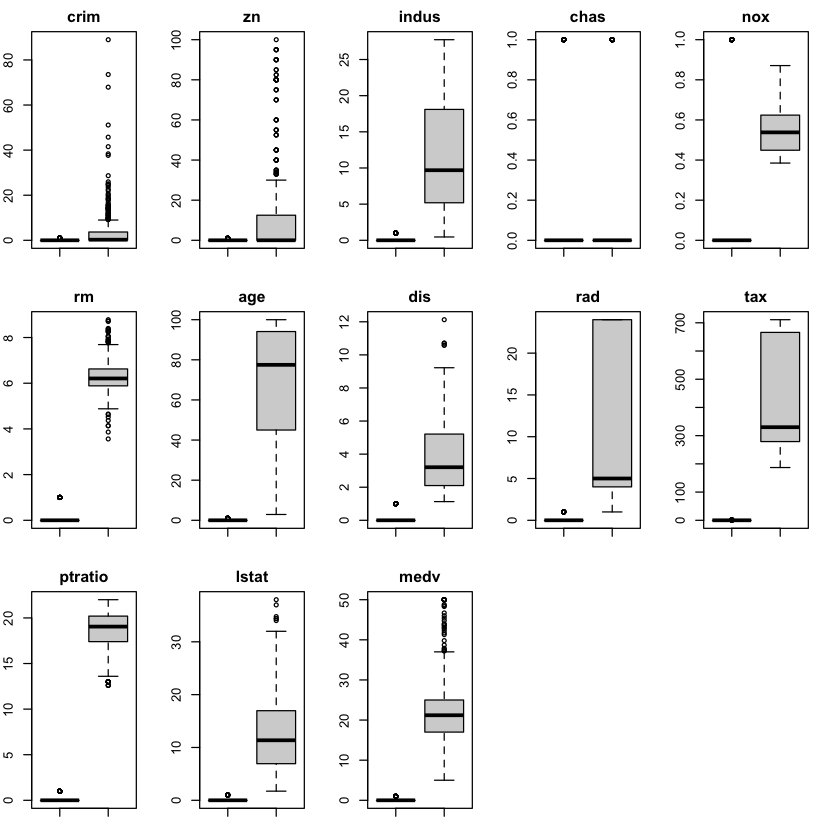

In [53]:
par(mfrow = c(3, 5), mar = c(2, 2, 2, 2))
for (i in seq(1, ncol(Boston))) {
    boxplot(Boston$chas, Boston[, nm[i]], main = nm[i])
}

(f) What is the median pupil-teacher ratio among the towns in this data set?

In [57]:
median(Boston$ptratio)

[1] 19.05

(g) Which census tract of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [74]:
median(subset(Boston, chas == 0)$medv)
median(subset(Boston, chas == 1)$medv)

[1] 20.9

[1] 23.3

In [85]:
chas0 <- subset(Boston, chas == 0)
lapply(chas0, median)

$crim
[1] 0.24522

$zn
[1] 0

$indus
[1] 8.56

$chas
[1] 0

$nox
[1] 0.538

$rm
[1] 6.202

$age
[1] 76.5

$dis
[1] 3.2157

$rad
[1] 5

$tax
[1] 330

$ptratio
[1] 19.1

$lstat
[1] 11.38

$medv
[1] 20.9

(h) In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the census tracts that average more than eight rooms per dwelling.

In [115]:
nrow(Boston[Boston$rm > 7, ])
nrow(Boston[Boston$rm > 8, ])

[1] 64

[1] 13

In [116]:
Boston[Boston$rm > 8, ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
98,0.12083,0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
164,1.51902,0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
205,0.02009,95,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.31533,0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
226,0.52693,0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
227,0.38214,0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
233,0.57529,0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
234,0.33147,0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
254,0.36894,22,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
